In [1]:
import pathlib

path = pathlib.Path().resolve()

path

PosixPath('/Users/tuna/Desktop/p/3')

In [2]:
import pandas as pd

HoursP_sum = pd.read_csv( path / 'HoursP_fix_valid_DailySum.csv')[['station','date','crain']]
DailyP = pd.read_csv( path / 'DailyP.csv' )[['station','date','Prcp']]

In [3]:
P_merged = pd.merge(HoursP_sum, DailyP, on=['station', 'date'], how='left')

P_merged = P_merged.dropna()

P_merged

,station,date,crain,Prcp
0,55279,2008-01-02,0.000000,0.0
1,55279,2008-01-03,0.000000,0.0
2,55279,2008-01-04,0.000000,0.0
3,55279,2008-01-05,0.000000,0.1
4,55279,2008-01-06,0.300000,0.0
...,...,...,...,...
567391,57105,2019-12-27,0.000000,0.0
567392,57105,2019-12-28,0.000000,0.0
567393,57105,2019-12-29,0.000000,0.0
567394,57105,2019-12-30,0.000000,0.0


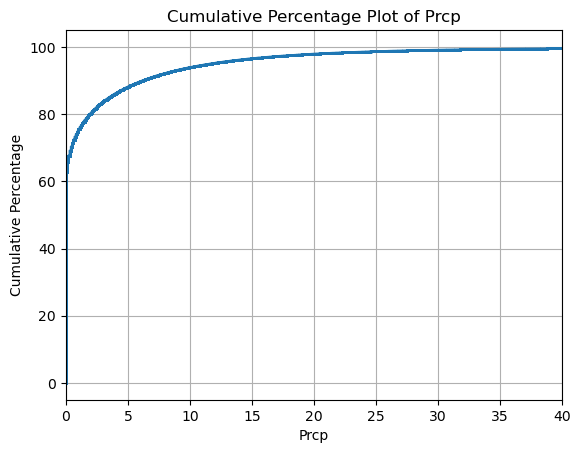

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 计算的累积百分比
sorted_absolute_error = np.sort(P_merged['Prcp'])
cumulative_percentage = np.arange(1, len(sorted_absolute_error) + 1) / len(sorted_absolute_error) * 100

# 绘制累积百分比图
plt.plot(sorted_absolute_error, cumulative_percentage, marker='o', linestyle='-', markersize=1)

# 添加标题和标签
plt.title('Cumulative Percentage Plot of Prcp')
plt.ylabel('Cumulative Percentage')
plt.xlabel('Prcp')

# 设置 x 轴范围为 0 到 100
plt.xlim(0, 40)

# 显示图形
plt.grid(True)
plt.show()


In [4]:
# 计算绝对误差并添加新列
P_merged['absolute_error'] = abs(P_merged['crain'] - P_merged['Prcp'])

# 显示修改后的 DataFrame
P_merged

,station,date,crain,Prcp,absolute_error
0,55279,2008-01-02,0.000000,0.0,0.000000
1,55279,2008-01-03,0.000000,0.0,0.000000
2,55279,2008-01-04,0.000000,0.0,0.000000
3,55279,2008-01-05,0.000000,0.1,0.100000
4,55279,2008-01-06,0.300000,0.0,0.300000
...,...,...,...,...,...
567391,57105,2019-12-27,0.000000,0.0,0.000000
567392,57105,2019-12-28,0.000000,0.0,0.000000
567393,57105,2019-12-29,0.000000,0.0,0.000000
567394,57105,2019-12-30,0.000000,0.0,0.000000


In [5]:
import pandas as pd

# 定义分级区间和标签
bins = [0, 0.1, 10, 25, 50, 100, 250, float('inf')]
labels = ['0-0.1', '0.1-9.9', '10-24.9', '25-49.9', '50-99.9', '100-249.9', '250及以上']

# 使用 pd.cut() 函数将 'Prcp' 列分级，并创建新的列 'Prcp_Group'
P_merged['Prcp_Group'] = pd.cut(P_merged['Prcp'], bins=bins, labels=labels, right=False)

# 根据分级提取不同的数据框并存储为变量
grouped_dfs = {}
for label in labels:
    grouped_dfs[label] = P_merged[P_merged['Prcp_Group'] == label].copy()

# 分别提取出不同的数据框
df_0_0_1 = grouped_dfs['0-0.1']
df_0_1_9_9 = grouped_dfs['0.1-9.9']
df_10_24_9 = grouped_dfs['10-24.9']
df_25_49_9 = grouped_dfs['25-49.9']
df_50_99_9 = grouped_dfs['50-99.9']
df_100_249_9 = grouped_dfs['100-249.9']
df_250_above = grouped_dfs['250及以上']



## df_0_0_1

In [6]:
df_0_0_1

,station,date,crain,Prcp,absolute_error,Prcp_Group
0,55279,2008-01-02,0.0,0.0,0.0,0-0.1
1,55279,2008-01-03,0.0,0.0,0.0,0-0.1
2,55279,2008-01-04,0.0,0.0,0.0,0-0.1
4,55279,2008-01-06,0.3,0.0,0.3,0-0.1
5,55279,2008-01-07,0.2,0.0,0.2,0-0.1
...,...,...,...,...,...,...
567390,57105,2019-12-26,0.0,0.0,0.0,0-0.1
567391,57105,2019-12-27,0.0,0.0,0.0,0-0.1
567392,57105,2019-12-28,0.0,0.0,0.0,0-0.1
567393,57105,2019-12-29,0.0,0.0,0.0,0-0.1


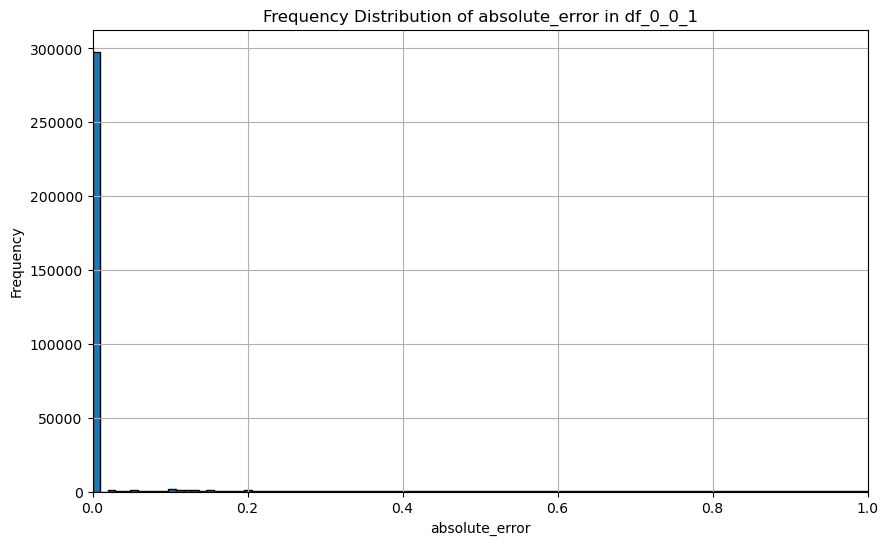

In [20]:
import matplotlib.pyplot as plt

# 绘制频率分布直方图
plt.figure(figsize=(10, 6))
plt.hist(df_0_0_1['absolute_error'], bins=5000, edgecolor='black')
plt.title('Frequency Distribution of absolute_error in df_0_0_1')
plt.xlabel('absolute_error')
plt.ylabel('Frequency')
plt.xlim(0, 1)
plt.grid(True)
plt.show()


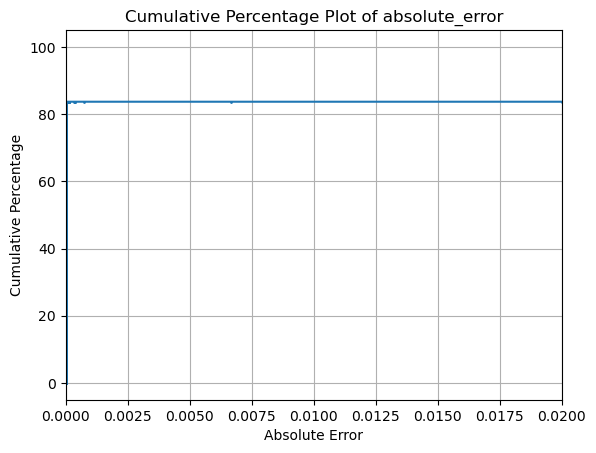

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 计算的累积百分比
sorted_absolute_error = np.sort(df_0_0_1['absolute_error'])
cumulative_percentage = np.arange(1, len(sorted_absolute_error) + 1) / len(sorted_absolute_error) * 100

# 绘制累积百分比图
plt.plot(sorted_absolute_error, cumulative_percentage, marker='o', linestyle='-', markersize=1)

# 添加标题和标签
plt.title('Cumulative Percentage Plot of absolute_error')
plt.ylabel('Cumulative Percentage')
plt.xlabel('Absolute Error')

# 设置 x 轴范围为 0 到 100
plt.xlim(0, 0.02)

# 显示图形
plt.grid(True)
plt.show()


## df_0_1_9_9

In [8]:
df_0_1_9_9

,station,date,crain,Prcp,absolute_error,Prcp_Group
3,55279,2008-01-05,0.000000,0.1,0.100000,0.1-9.9
10,55279,2008-01-12,0.000000,0.1,0.100000,0.1-9.9
17,55279,2008-01-19,0.000000,0.4,0.400000,0.1-9.9
28,55279,2008-01-30,0.000000,0.1,0.100000,0.1-9.9
29,55279,2008-01-31,0.000000,1.2,1.200000,0.1-9.9
...,...,...,...,...,...,...
567383,57105,2019-12-19,0.000000,0.3,0.300000,0.1-9.9
567384,57105,2019-12-20,0.000000,0.1,0.100000,0.1-9.9
567388,57105,2019-12-24,0.405967,0.5,0.094033,0.1-9.9
567389,57105,2019-12-25,0.202988,1.1,0.897012,0.1-9.9


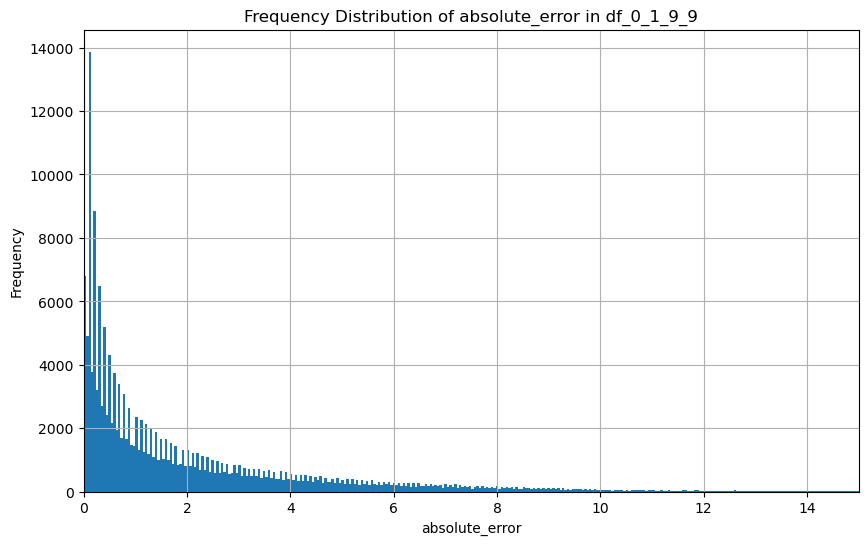

In [9]:
import matplotlib.pyplot as plt

# 绘制频率分布直方图
plt.figure(figsize=(10, 6))
plt.hist(df_0_1_9_9['absolute_error'], bins=2000)
plt.title('Frequency Distribution of absolute_error in df_0_1_9_9')
plt.xlabel('absolute_error')
plt.ylabel('Frequency')
plt.xlim(0, 15)
plt.grid(True)
plt.show()


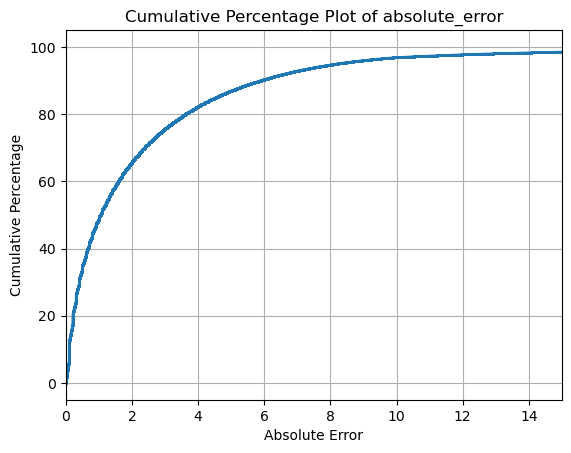

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 计算的累积百分比
sorted_absolute_error = np.sort(df_0_1_9_9['absolute_error'])
cumulative_percentage = np.arange(1, len(sorted_absolute_error) + 1) / len(sorted_absolute_error) * 100

# 绘制累积百分比图
plt.plot(sorted_absolute_error, cumulative_percentage, marker='o', linestyle='-', markersize=1)

# 添加标题和标签
plt.title('Cumulative Percentage Plot of absolute_error')
plt.ylabel('Cumulative Percentage')
plt.xlabel('Absolute Error')

# 设置 x 轴范围为 0 到 100
plt.xlim(0, 15)

# 显示图形
plt.grid(True)
plt.show()


## df_10_24_9

In [10]:
df_10_24_9

,station,date,crain,Prcp,absolute_error,Prcp_Group
172,55279,2008-06-22,2.646667,12.5,9.853333,10-24.9
182,55279,2008-07-02,3.326747,12.3,8.973253,10-24.9
190,55279,2008-07-10,7.448617,13.3,5.851383,10-24.9
194,55279,2008-07-14,5.047160,24.1,19.052840,10-24.9
211,55279,2008-07-31,3.111016,21.0,17.888984,10-24.9
...,...,...,...,...,...,...
567288,57105,2019-09-14,4.598126,12.4,7.801874,10-24.9
567291,57105,2019-09-17,5.599201,11.1,5.500799,10-24.9
567305,57105,2019-10-01,4.016619,18.2,14.183381,10-24.9
567319,57105,2019-10-15,9.067856,10.1,1.032144,10-24.9


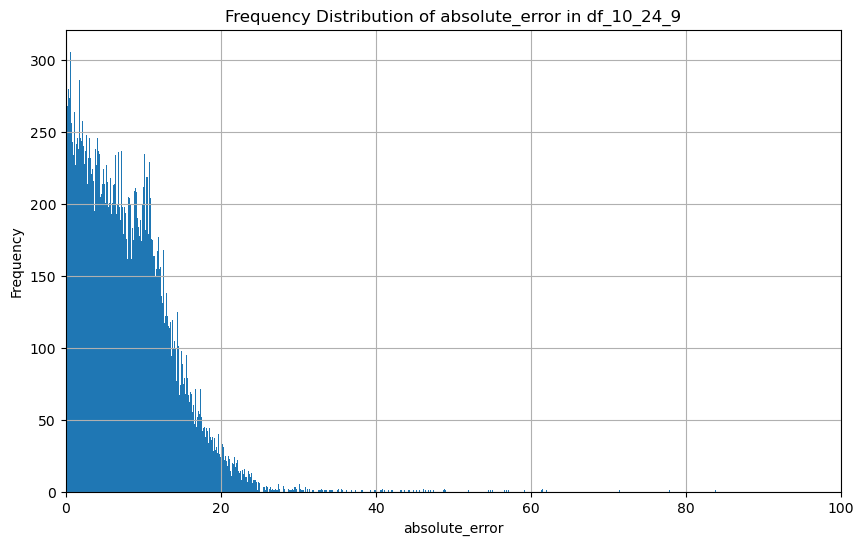

In [11]:
import matplotlib.pyplot as plt

# 绘制频率分布直方图
plt.figure(figsize=(10, 6))
plt.hist(df_10_24_9['absolute_error'], bins=1000)
plt.title('Frequency Distribution of absolute_error in df_10_24_9')
plt.xlabel('absolute_error')
plt.ylabel('Frequency')
plt.xlim(0, 100)
plt.grid(True)
plt.show()

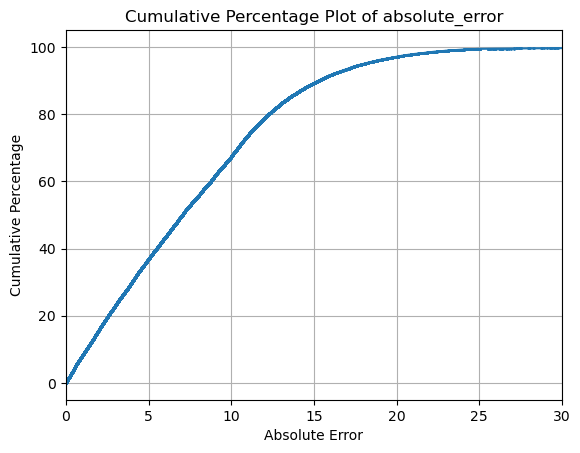

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 计算的累积百分比
sorted_absolute_error = np.sort(df_10_24_9['absolute_error'])
cumulative_percentage = np.arange(1, len(sorted_absolute_error) + 1) / len(sorted_absolute_error) * 100

# 绘制累积百分比图
plt.plot(sorted_absolute_error, cumulative_percentage, marker='o', linestyle='-', markersize=1)

# 添加标题和标签
plt.title('Cumulative Percentage Plot of absolute_error')
plt.ylabel('Cumulative Percentage')
plt.xlabel('Absolute Error')

# 设置 x 轴范围为 0 到 100
plt.xlim(0, 30)

# 显示图形
plt.grid(True)
plt.show()

## df_25_49_9

In [12]:
df_25_49_9

,station,date,crain,Prcp,absolute_error,Prcp_Group
542,55279,2009-06-30,4.022504,26.0,21.977496,25-49.9
1247,55279,2011-06-30,16.999057,35.2,18.200943,25-49.9
3331,55279,2017-07-27,15.373327,25.4,10.026673,25-49.9
3605,55279,2018-08-01,14.658904,25.2,10.541096,25-49.9
5043,55294,2010-08-22,14.383924,26.0,11.616076,25-49.9
...,...,...,...,...,...,...
567175,57105,2019-05-06,36.700205,43.1,6.399795,25-49.9
567205,57105,2019-06-05,0.000000,44.9,44.900000,25-49.9
567249,57105,2019-08-02,44.645330,38.3,6.345330,25-49.9
567286,57105,2019-09-12,52.669150,37.0,15.669150,25-49.9


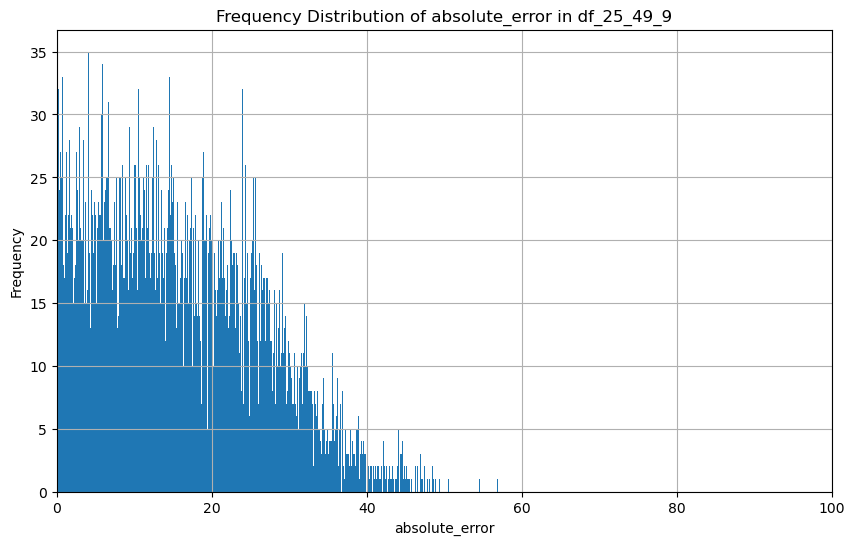

In [13]:
import matplotlib.pyplot as plt

# 绘制频率分布直方图
plt.figure(figsize=(10, 6))
plt.hist(df_25_49_9['absolute_error'], bins=1000)
plt.title('Frequency Distribution of absolute_error in df_25_49_9')
plt.xlabel('absolute_error')
plt.ylabel('Frequency')
plt.xlim(0, 100)
plt.grid(True)
plt.show()

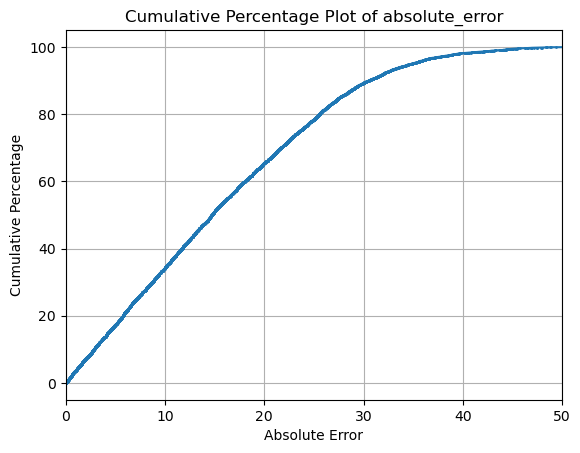

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 计算的累积百分比
sorted_absolute_error = np.sort(df_25_49_9['absolute_error'])
cumulative_percentage = np.arange(1, len(sorted_absolute_error) + 1) / len(sorted_absolute_error) * 100

# 绘制累积百分比图
plt.plot(sorted_absolute_error, cumulative_percentage, marker='o', linestyle='-', markersize=1)

# 添加标题和标签
plt.title('Cumulative Percentage Plot of absolute_error')
plt.ylabel('Cumulative Percentage')
plt.xlabel('Absolute Error')

# 设置 x 轴范围为 0 到 100
plt.xlim(0, 50)

# 显示图形
plt.grid(True)
plt.show()

## df_50_99_9

In [14]:
df_50_99_9

,station,date,crain,Prcp,absolute_error,Prcp_Group
7129,55294,2016-09-04,20.048786,54.2,34.151214,50-99.9
20714,55690,2008-10-27,0.663168,97.7,97.036832,50-99.9
78175,56074,2009-07-21,1.591140,93.5,91.908860,50-99.9
82947,56079,2011-07-03,19.039254,51.4,32.360746,50-99.9
83694,56079,2013-08-27,26.658093,52.6,25.941907,50-99.9
...,...,...,...,...,...,...
566321,57105,2016-07-18,41.092319,52.4,11.307681,50-99.9
566636,57105,2017-07-05,52.122008,63.0,10.877992,50-99.9
566652,57105,2017-08-07,44.151799,65.0,20.848201,50-99.9
566900,57105,2018-07-10,88.776364,85.6,3.176364,50-99.9


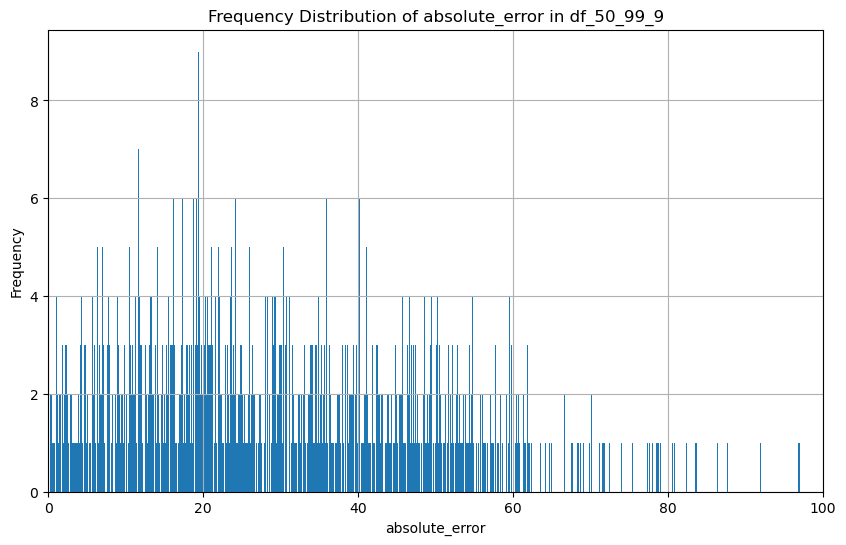

In [15]:
import matplotlib.pyplot as plt

# 绘制频率分布直方图
plt.figure(figsize=(10, 6))
plt.hist(df_50_99_9['absolute_error'], bins=1000)
plt.title('Frequency Distribution of absolute_error in df_50_99_9')
plt.xlabel('absolute_error')
plt.ylabel('Frequency')
plt.xlim(0, 100)
plt.grid(True)
plt.show()

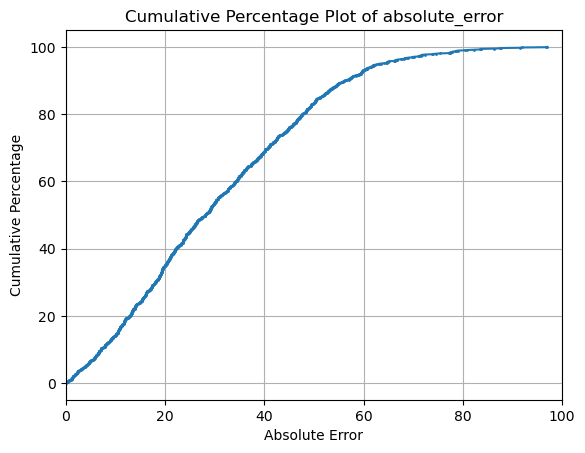

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 计算的累积百分比
sorted_absolute_error = np.sort(df_50_99_9['absolute_error'])
cumulative_percentage = np.arange(1, len(sorted_absolute_error) + 1) / len(sorted_absolute_error) * 100

# 绘制累积百分比图
plt.plot(sorted_absolute_error, cumulative_percentage, marker='o', linestyle='-', markersize=1)

# 添加标题和标签
plt.title('Cumulative Percentage Plot of absolute_error')
plt.ylabel('Cumulative Percentage')
plt.xlabel('Absolute Error')

# 设置 x 轴范围为 0 到 100
plt.xlim(0, 100)

# 显示图形
plt.grid(True)
plt.show()

## df_100_249_9

In [16]:
df_100_249_9

,station,date,crain,Prcp,absolute_error,Prcp_Group
76564,56071,2016-08-23,5.608521,123.5,117.891479,100-249.9
196979,56181,2010-08-19,103.388895,136.1,32.711105,100-249.9
197974,56181,2013-07-09,149.234480,145.6,3.634480,100-249.9
197975,56181,2013-07-10,99.776271,117.4,17.623729,100-249.9
198001,56181,2013-08-07,76.714552,137.4,60.685448,100-249.9
...,...,...,...,...,...,...
545970,56766,2016-10-01,65.433180,168.0,102.566820,100-249.9
546438,56766,2018-05-27,48.481075,138.6,90.118925,100-249.9
558487,57007,2017-08-07,45.437392,108.4,62.962608,100-249.9
563875,57105,2009-07-17,77.416841,162.0,84.583159,100-249.9


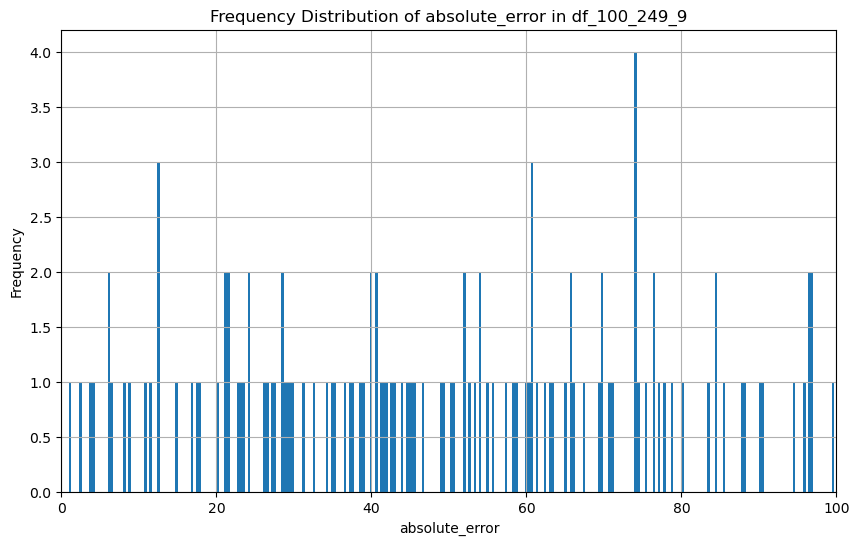

In [17]:
import matplotlib.pyplot as plt

# 绘制频率分布直方图
plt.figure(figsize=(10, 6))
plt.hist(df_100_249_9['absolute_error'], bins=500)
plt.title('Frequency Distribution of absolute_error in df_100_249_9')
plt.xlabel('absolute_error')
plt.ylabel('Frequency')
plt.xlim(0, 100)
plt.grid(True)
plt.show()

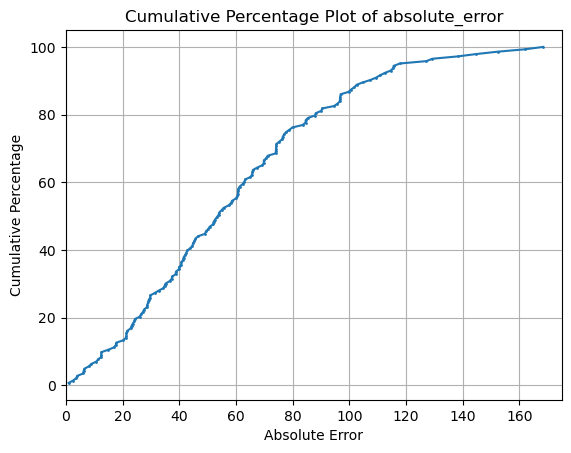

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 计算的累积百分比
sorted_absolute_error = np.sort(df_100_249_9['absolute_error'])
cumulative_percentage = np.arange(1, len(sorted_absolute_error) + 1) / len(sorted_absolute_error) * 100

# 绘制累积百分比图
plt.plot(sorted_absolute_error, cumulative_percentage, marker='o', linestyle='-', markersize=1)

# 添加标题和标签
plt.title('Cumulative Percentage Plot of absolute_error')
plt.ylabel('Cumulative Percentage')
plt.xlabel('Absolute Error')

# 设置 x 轴范围为 0 到 100
plt.xlim(0, 175)

# 显示图形
plt.grid(True)
plt.show()

## df_250_above

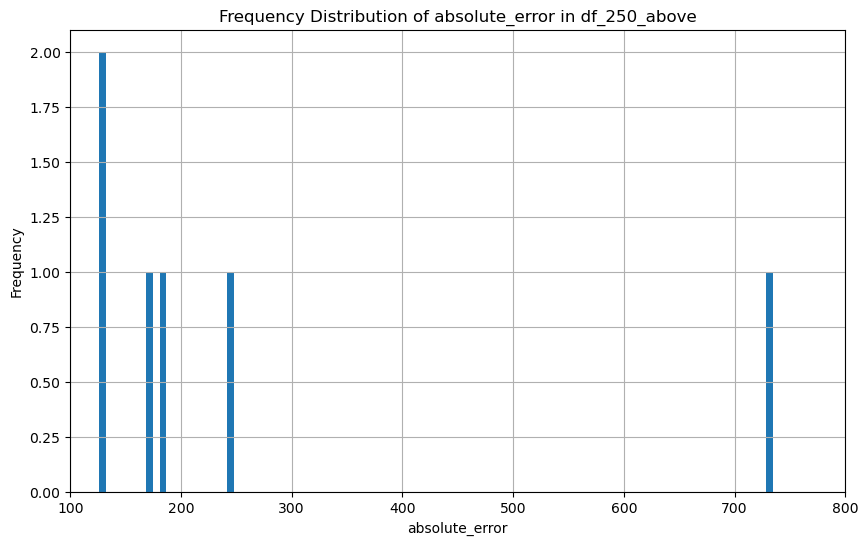

In [18]:
import matplotlib.pyplot as plt

# 绘制频率分布直方图
plt.figure(figsize=(10, 6))
plt.hist(df_250_above['absolute_error'], bins=100)
plt.title('Frequency Distribution of absolute_error in df_250_above')
plt.xlabel('absolute_error')
plt.ylabel('Frequency')
plt.xlim(100, 800)
plt.grid(True)
plt.show()

In [19]:
df_250_above

,station,date,crain,Prcp,absolute_error,Prcp_Group
217391,56186,2010-08-19,119.007584,292.5,173.492416,250及以上
226538,56188,2013-07-09,178.950148,423.8,244.849852,250及以上
232248,56189,2018-07-11,127.327240,253.4,126.072760,250及以上
303106,56285,2010-08-19,90.344739,276.4,186.055261,250及以上
304100,56285,2013-07-10,148.867691,279.2,130.332309,250及以上
431906,56575,2017-03-21,2.911359,737.3,734.388641,250及以上
